<a href="https://colab.research.google.com/github/nisargbm/ACPS/blob/master/Check_Preocessing_Amt_Removing_Slash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


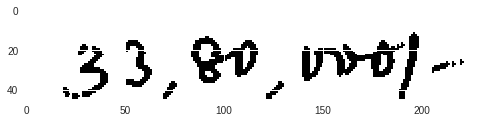

In [0]:
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('drive/My Drive/FYP/Automated cheque processing/dataset/amount/Cheque 100834.tif')
gray  = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
###saltpep = cv2.fastNlMeansDenoising(gray,None,9,13)
#sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
th2 = cv2.adaptiveThreshold(gray,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)
from cv2 import erode
import numpy as np    
#kernel = np.ones((2,1),dtype=np.uint8) # this must be tuned 

#im1=erode(gray,kernel)

#blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,2))
morph_img = cv2.erode(gray,kernel,iterations=2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,3))
morph_img = cv2.dilate(morph_img,kernel,iterations = 1)
#sobelx = cv2.Sobel(morph_img,cv2.CV_64F,1,0,ksize=5)
#saltpep = cv2.fastNlMeansDenoising(morph_img,None,9,13)
#tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, kernel)


#edged = cv2.Canny(gray,50,100)
#edged = cv2.dilate(edged,None,iterations = 1)
#edged = cv2.erode(edged,None,iterations = 1)
plt.imshow(morph_img)
plt.show()




In [0]:
cv2.getStructuringElement(cv2.MORPH_RECT,(4,8))

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

In [0]:
import imutils
cnts = cv2.findContours(morph_img.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)
#c = sorted(cnts, key = cv2.contourArea, reverse = True)[:]



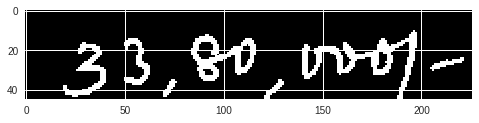

In [0]:
import math
hyphen_cnts=[] 
slash_cnts = []
maxi = -1
right= -1
for i,c in enumerate(cnts):
  extLeft = tuple(c[c[:, :, 0].argmin()][0])
  extRight = tuple(c[c[:, :, 0].argmax()][0])
  extTop = tuple(c[c[:, :, 1].argmin()][0])
  extBot = tuple(c[c[:, :, 1].argmax()][0])
#   cv2.drawContours(image, [c], -1, (0, 255, 255), 2)
#   cv2.circle(image, extLeft, 1, (0, 0, 255), -1)
#   cv2.circle(image, extRight, 1, (0, 255, 0), -1)
#   cv2.circle(image, extTop, 1, (255, 0, 0), -1)
#   cv2.circle(image, extBot, 1, (255, 255, 0), -1)
  dist =  abs((extTop[1]-extBot[1]))
  if(dist>maxi):
    hyphen_cnts = c
    maxi = dist
  if(extRight[0]>right) and abs(extRight[0]-extLeft[0])>5:
    slash_cnts = c
    right = extRight[0]
  #print("extLeft ",extLeft," extright ",extRight,"extTop",extTop," extBot ",extBot)
plt.imshow(image)
plt.show()

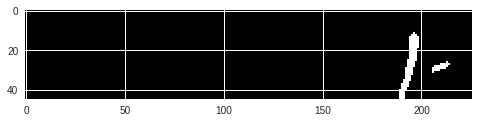

In [0]:
import numpy as np
from matplotlib import pyplot as plt

mask = np.ones(image.shape[:2], dtype="uint8") * 255
cv2.drawContours(mask,[hyphen_cnts],-1,0,-1)
cv2.drawContours(mask,[slash_cnts],-1,0,-1)
plt.imshow(mask)
plt.show()

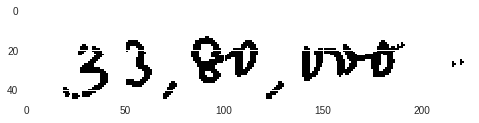

In [0]:
image1 = cv2.bitwise_and(morph_img, morph_img, mask=mask)
plt.imshow(image1)
plt.show()

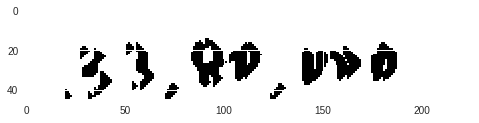

In [0]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,2))
morph_img2 = cv2.erode(image1,kernel,iterations=3)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,3))
morph_img2 = cv2.dilate(morph_img2,kernel,iterations = 2)
plt.imshow(morph_img2)
plt.show()

In [0]:
extLeft = tuple(slash_cnts[slash_cnts[:, :, 0].argmin()][0])
extRight = tuple(slash_cnts[slash_cnts[:, :, 0].argmax()][0])
extTop = tuple(slash_cnts[slash_cnts[:, :, 1].argmin()][0])
extBot = tuple(slash_cnts[slash_cnts[:, :, 1].argmax()][0])
print(extLeft[0]-extRight[0])

-8


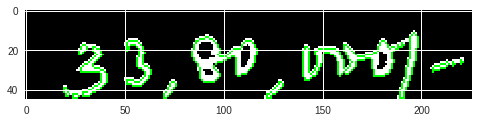

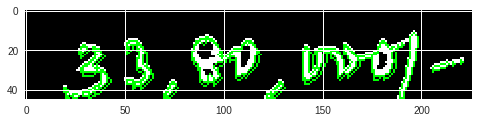

In [0]:

cnts = cv2.findContours(morph_img2.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_NONE)
cnts = imutils.grab_contours(cnts)
plt.imshow(image)
plt.show()
for (i,c) in enumerate(cnts) :
#   x,y,w,h = cv2.boundingRect(c)
#   box = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
  box = cv2.minAreaRect(c)
  box = cv2.boxPoints(box)
  box = np.array(box,dtype = 'int')
  cv2.drawContours(image,[c],-1,(0,255,0),1)
  #print("Object #{}:".format(i + 1))
  #print(box)
plt.imshow(image)
plt.show()

[[[200  27]]

 [[199  28]]

 [[194  28]]

 [[193  29]]

 [[192  29]]

 [[190  31]]

 [[190  34]]

 [[191  34]]

 [[195  30]]

 [[197  30]]

 [[198  29]]

 [[200  29]]

 [[201  28]]

 [[203  28]]

 [[204  27]]]
[[[164  15]]

 [[157  22]]

 [[154  18]]

 [[150  21]]

 [[146  18]]

 [[139  19]]

 [[132  16]]

 [[128  29]]

 [[131  36]]

 [[138  31]]

 [[139  21]]

 [[147  22]]

 [[149  35]]

 [[157  24]]

 [[160  25]]

 [[162  34]]

 [[167  33]]

 [[171  26]]

 [[171  21]]

 [[167  15]]]


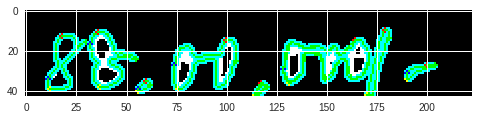

In [0]:
print(slash_cnts)
epsilon = 0.01*cv2.arcLength(hyphen_cnts,True)
approx = cv2.approxPolyDP(hyphen_cnts,epsilon,False)
print(approx)
cv2.drawContours(image,[approx],-1,(0,255,0),1)
plt.imshow(image)
plt.show()
